In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import os
import plotly.express as px
from datetime import datetime

In [2]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

Defaulting to user installation because normal site-packages is not writeable


In [3]:
model = pd.read_csv("Model.csv")
# model=delay.copy()
model.drop(columns=['YEAR','DATE','TAXI_OUT','TAXI_IN','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL'], inplace=True)
model.columns

Index(['MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_TIME', 'DELAY', 'Temp High', 'Temp Low', 'Wind',
       'Number of ORI_AIR', 'Number of DES_AIR', 'MEAN OF TAXI_IN',
       'MEAN OF TAXI_OUT', 'DEPARTURE', 'ARRIVAL', 'PREDELAY'],
      dtype='object')

In [4]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346959 entries, 0 to 346958
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                346959 non-null  int64  
 1   DAY                  346959 non-null  int64  
 2   AIRLINE              346959 non-null  object 
 3   ORIGIN_AIRPORT       346959 non-null  object 
 4   DESTINATION_AIRPORT  346959 non-null  object 
 5   SCHEDULED_TIME       346959 non-null  float64
 6   DELAY                346959 non-null  object 
 7   Temp High            346959 non-null  float64
 8   Temp Low             346959 non-null  float64
 9   Wind                 346959 non-null  float64
 10  Number of ORI_AIR    346959 non-null  int64  
 11  Number of DES_AIR    346959 non-null  int64  
 12  MEAN OF TAXI_IN      346959 non-null  float64
 13  MEAN OF TAXI_OUT     346959 non-null  float64
 14  DEPARTURE            346959 non-null  int64  
 15  ARRIVAL          

In [5]:
do_dummy_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
model= pd.get_dummies(model, columns=do_dummy_cols)
model['DELAY'].replace(['Yes','No'], [1,0], inplace=True)
model['PREDELAY'].replace(['Yes','No'], [1,0], inplace=True)
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346959 entries, 0 to 346958
Columns: 181 entries, MONTH to DESTINATION_AIRPORT_ZRH
dtypes: float64(6), int64(8), uint8(167)
memory usage: 92.3 MB


In [6]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
model

,MONTH,DAY,SCHEDULED_TIME,DELAY,Temp High,Temp Low,Wind,Number of ORI_AIR,Number of DES_AIR,MEAN OF TAXI_IN,...,DESTINATION_AIRPORT_VCA,DESTINATION_AIRPORT_VCL,DESTINATION_AIRPORT_VCS,DESTINATION_AIRPORT_VDH,DESTINATION_AIRPORT_VDO,DESTINATION_AIRPORT_VIE,DESTINATION_AIRPORT_VII,DESTINATION_AIRPORT_VKG,DESTINATION_AIRPORT_VTE,DESTINATION_AIRPORT_ZRH
0,1,1,213.0,0,28.0,28.0,22.0,1,66,7.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,1,200.0,0,12.0,8.0,1.0,7,66,5.666667,...,0,0,0,0,0,0,0,0,0,0
2,1,1,203.0,0,14.0,4.0,5.0,7,66,5.666667,...,0,0,0,0,0,0,0,0,0,0
3,1,1,200.0,0,16.0,13.0,4.0,7,66,5.666667,...,0,0,0,0,0,0,0,0,0,0
4,1,1,310.0,0,12.0,8.0,1.0,7,10,7.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346954,12,30,180.0,1,22.0,20.0,14.0,1,1,10.000000,...,0,0,0,0,0,0,0,0,0,0
346955,12,30,93.0,0,29.0,26.0,32.0,1,1,8.000000,...,0,0,0,0,0,0,0,0,0,0
346956,12,31,21.0,0,36.0,27.0,7.0,3,3,3.000000,...,0,0,0,0,0,0,0,0,0,0
346957,12,31,21.0,0,8.0,4.0,19.0,3,3,3.000000,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = model['DELAY']
X = model.drop(columns=['DELAY'])
sc = StandardScaler()
X= sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
clf_name = []
roc_auc = []
f1 = []
acc = []
pre = []
rec = []
l = []
def model_eval(clf, y_test, y_pred,x):
    print(clf)
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    m3 = accuracy_score(y_test, y_pred)
    m4 = precision_score(y_test, y_pred)
    m5 = recall_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    print('Accurary Score: {:.04f}'.format(m3))
    print('Precision Score: {:.04f}'.format(m4))
    print('Recall Score: {:.04f}'.format(m5))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)
    acc.append(m3)
    pre.append(m4)
    rec.append(m5)
    l.append(x)

# Không cân bằng

In [10]:
x='Unbalanced'

In [40]:
y_train.value_counts()

0    219182
1     58385
Name: DELAY, dtype: int64

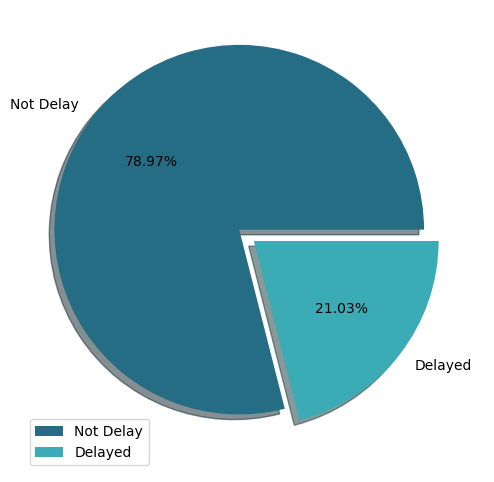

In [41]:
plt.figure(figsize= (10, 6))
labels = ['Not Delay', 'Delayed']
explode = [0.1, 0]
plt.pie(y_train.value_counts() ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     54925
           1       0.68      0.15      0.24     14467

    accuracy                           0.81     69392
   macro avg       0.75      0.56      0.57     69392
weighted avg       0.79      0.81      0.76     69392

ROC_AUC_Score: 0.5649
F1 Score: 0.2431
Accurary Score: 0.8080
Precision Score: 0.6827
Recall Score: 0.1479


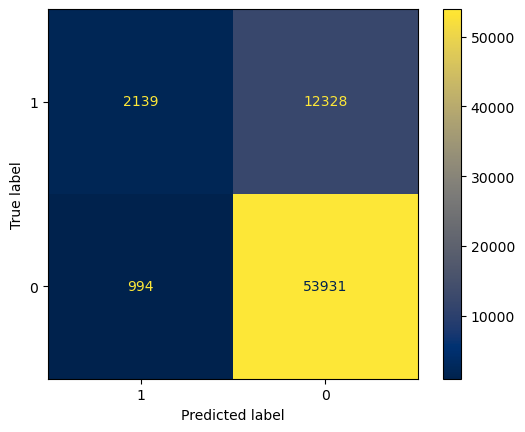

In [11]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost Classifier'
model_eval(clf, y_test, y_pred,x)

Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     54925
           1       0.67      0.15      0.24     14467

    accuracy                           0.81     69392
   macro avg       0.74      0.56      0.57     69392
weighted avg       0.78      0.81      0.75     69392

ROC_AUC_Score: 0.5649
F1 Score: 0.2439
Accurary Score: 0.8073
Precision Score: 0.6695
Recall Score: 0.1491


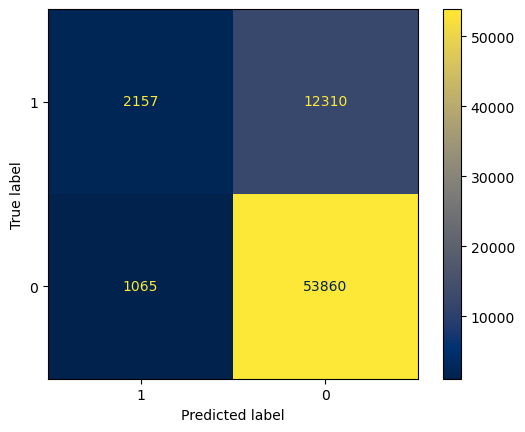

In [12]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
lr=lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
clf = 'Logistic Regression'
model_eval(clf, y_test, y_pred,x)

Support Vector Machines
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     54925
           1       0.68      0.12      0.21     14467

    accuracy                           0.81     69392
   macro avg       0.74      0.55      0.55     69392
weighted avg       0.78      0.81      0.75     69392

ROC_AUC_Score: 0.5546
F1 Score: 0.2109
Accurary Score: 0.8051
Precision Score: 0.6760
Recall Score: 0.1249


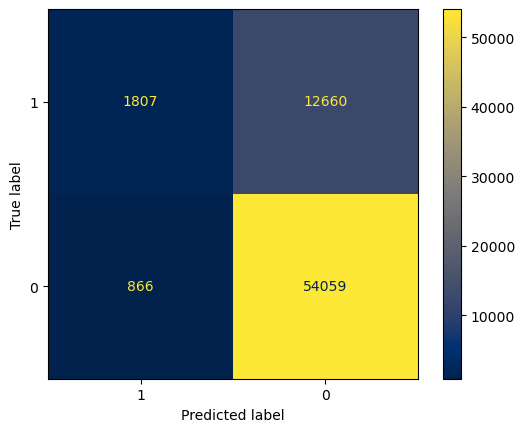

In [13]:
svm =LinearSVC()
svm=svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
clf = 'Support Vector Machines'
model_eval(clf, y_test, y_pred,x)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     54925
           1       0.61      0.64      0.63     14467

    accuracy                           0.84     69392
   macro avg       0.76      0.77      0.76     69392
weighted avg       0.84      0.84      0.84     69392

ROC_AUC_Score: 0.7679
F1 Score: 0.6275
Accurary Score: 0.8409
Precision Score: 0.6128
Recall Score: 0.6428


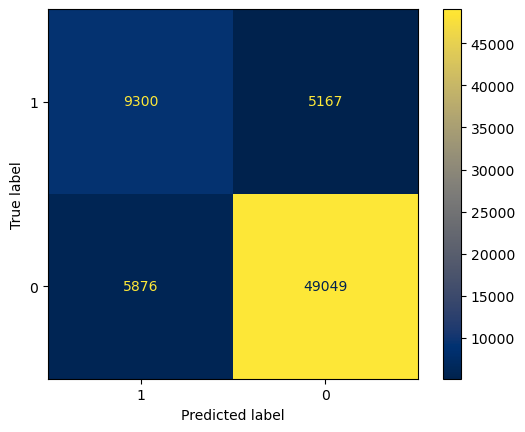

In [14]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
clf = 'Decision Tree Classifier'
model_eval(clf, y_test, y_pred,x)

AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     54925
           1       0.67      0.15      0.24     14467

    accuracy                           0.81     69392
   macro avg       0.74      0.56      0.56     69392
weighted avg       0.78      0.81      0.75     69392

ROC_AUC_Score: 0.5637
F1 Score: 0.2406
Accurary Score: 0.8068
Precision Score: 0.6670
Recall Score: 0.1467


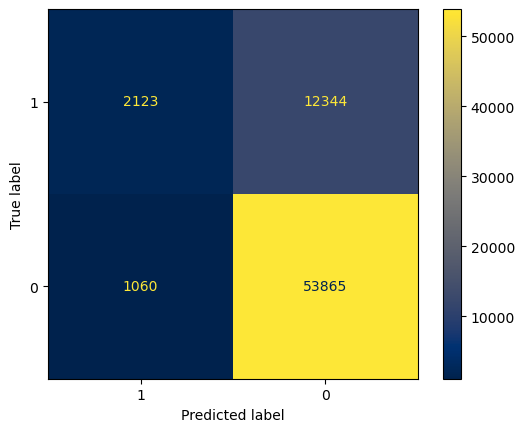

In [15]:
ada=AdaBoostClassifier()
ada=ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
clf = 'AdaBoost Classifier'
model_eval(clf, y_test, y_pred,x)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     54925
           1       0.87      0.45      0.59     14467

    accuracy                           0.87     69392
   macro avg       0.87      0.72      0.76     69392
weighted avg       0.87      0.87      0.85     69392

ROC_AUC_Score: 0.7156
F1 Score: 0.5921
Accurary Score: 0.8710
Precision Score: 0.8689
Recall Score: 0.4491


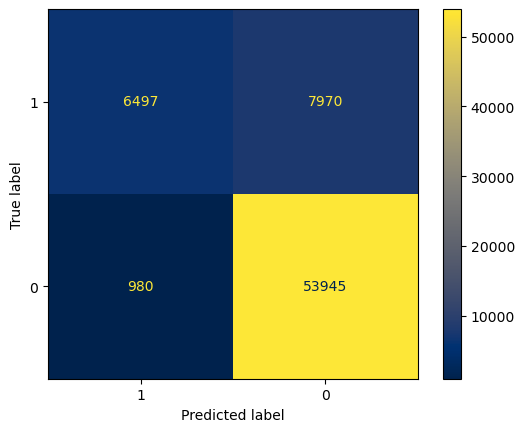

In [16]:
rfw=RandomForestClassifier()
rfw=rfw.fit(X_train, y_train)
y_pred = rfw.predict(X_test)
clf = 'Random Forest Classifier'
model_eval(clf, y_test, y_pred,x)

# RandomOverSampler

In [17]:
x='Over Sampler'

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
classes_ros = y_train_ros.value_counts()
classes_ros

1    219182
0    219182
Name: DELAY, dtype: int64

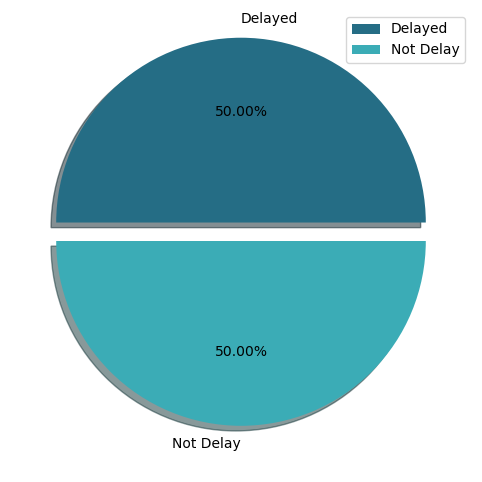

In [20]:
plt.figure(figsize= (10, 6))
labels = ['Delayed', 'Not Delay']
explode = [0.1, 0]
plt.pie(classes_ros ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.88      0.69      0.77     54925
           1       0.35      0.64      0.46     14467

    accuracy                           0.68     69392
   macro avg       0.62      0.67      0.62     69392
weighted avg       0.77      0.68      0.71     69392

ROC_AUC_Score: 0.6663
F1 Score: 0.4560
Accurary Score: 0.6816
Precision Score: 0.3541
Recall Score: 0.6400


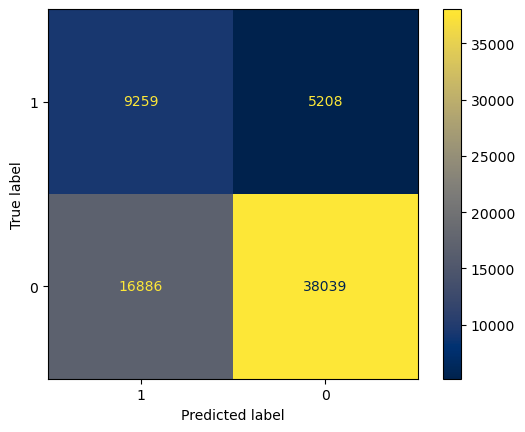

In [21]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=0)
xgb_clf.fit(X_train_ros, y_train_ros)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost Classifier'
model_eval(clf, y_test, y_pred,x)

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     54925
           1       0.35      0.62      0.44     14467

    accuracy                           0.68     69392
   macro avg       0.61      0.66      0.61     69392
weighted avg       0.76      0.68      0.70     69392

ROC_AUC_Score: 0.6561
F1 Score: 0.4447
Accurary Score: 0.6769
Precision Score: 0.3465
Recall Score: 0.6206


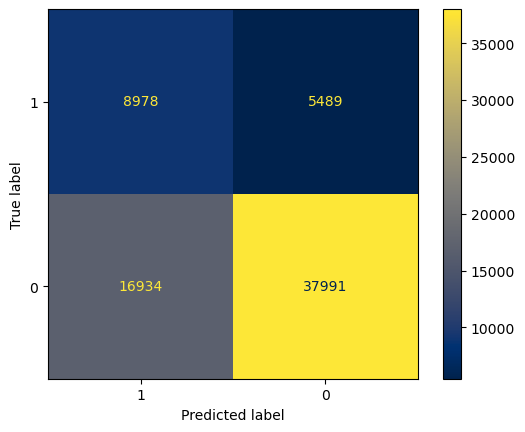

In [22]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
lr=lr.fit(X_train_ros, y_train_ros)
y_pred = lr.predict(X_test)
clf = 'Logistic Regression'
model_eval(clf, y_test, y_pred,x)

Support Vector Machines
              precision    recall  f1-score   support

           0       0.87      0.70      0.77     54925
           1       0.34      0.61      0.44     14467

    accuracy                           0.68     69392
   macro avg       0.61      0.65      0.61     69392
weighted avg       0.76      0.68      0.70     69392

ROC_AUC_Score: 0.6507
F1 Score: 0.4387
Accurary Score: 0.6771
Precision Score: 0.3440
Recall Score: 0.6054


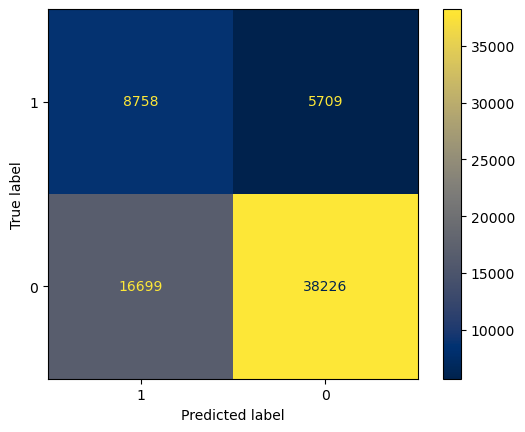

In [23]:
svm =LinearSVC()
svm=svm.fit(X_train_ros, y_train_ros)
y_pred = svm.predict(X_test)
clf = 'Support Vector Machines'
model_eval(clf, y_test, y_pred,x)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     54925
           1       0.63      0.64      0.64     14467

    accuracy                           0.85     69392
   macro avg       0.77      0.77      0.77     69392
weighted avg       0.85      0.85      0.85     69392

ROC_AUC_Score: 0.7710
F1 Score: 0.6360
Accurary Score: 0.8472
Precision Score: 0.6319
Recall Score: 0.6401


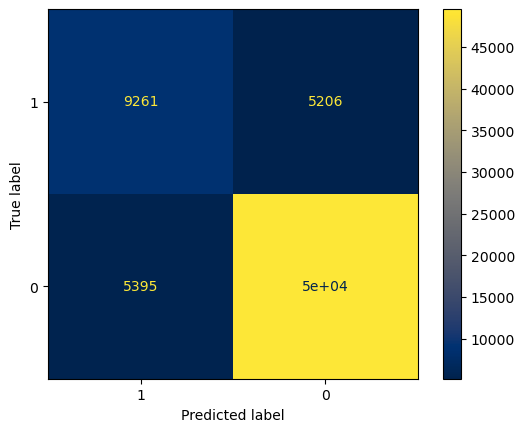

In [24]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train_ros, y_train_ros)
y_pred = dt.predict(X_test)
clf = 'Decision Tree Classifier'
model_eval(clf, y_test, y_pred,x)

AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     54925
           1       0.34      0.63      0.44     14467

    accuracy                           0.67     69392
   macro avg       0.61      0.66      0.61     69392
weighted avg       0.76      0.67      0.70     69392

ROC_AUC_Score: 0.6556
F1 Score: 0.4438
Accurary Score: 0.6731
Precision Score: 0.3439
Recall Score: 0.6255


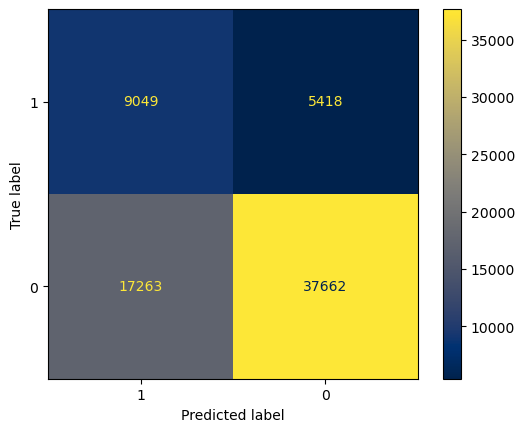

In [25]:
ada=AdaBoostClassifier()
ada=ada.fit(X_train_ros, y_train_ros)
y_pred = ada.predict(X_test)
clf = 'AdaBoost Classifier'
model_eval(clf, y_test, y_pred,x)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     54925
           1       0.81      0.65      0.72     14467

    accuracy                           0.90     69392
   macro avg       0.86      0.81      0.83     69392
weighted avg       0.89      0.90      0.89     69392

ROC_AUC_Score: 0.8057
F1 Score: 0.7233
Accurary Score: 0.8962
Precision Score: 0.8145
Recall Score: 0.6504


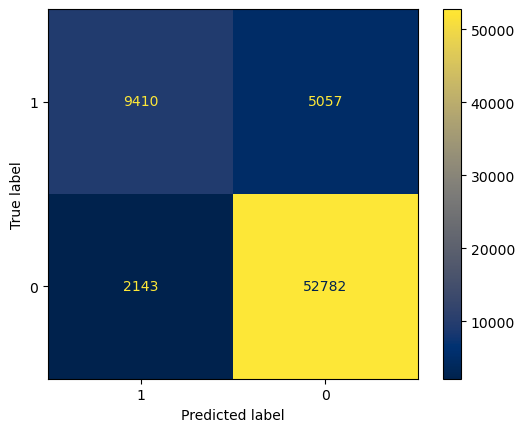

In [26]:
rfw=RandomForestClassifier()
rfw=rfw.fit(X_train_ros, y_train_ros)
y_pred = rfw.predict(X_test)
clf = 'Random Forest Classifier'
model_eval(clf, y_test, y_pred,x)

# RandomUnderSampler

In [27]:
x='Under Sampler'

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
classes_rus = y_train_rus.value_counts()
classes_rus

0    58385
1    58385
Name: DELAY, dtype: int64

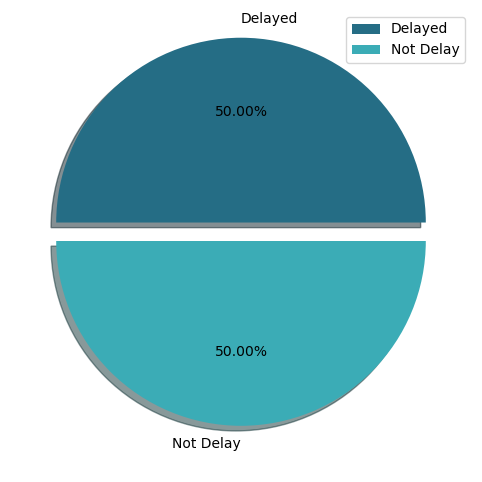

In [30]:
plt.figure(figsize= (10, 6))
labels = ['Delayed', 'Not Delay']
explode = [0.1, 0]
plt.pie(classes_rus ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.88      0.69      0.77     54925
           1       0.35      0.64      0.46     14467

    accuracy                           0.68     69392
   macro avg       0.62      0.67      0.61     69392
weighted avg       0.77      0.68      0.71     69392

ROC_AUC_Score: 0.6660
F1 Score: 0.4554
Accurary Score: 0.6793
Precision Score: 0.3525
Recall Score: 0.6433


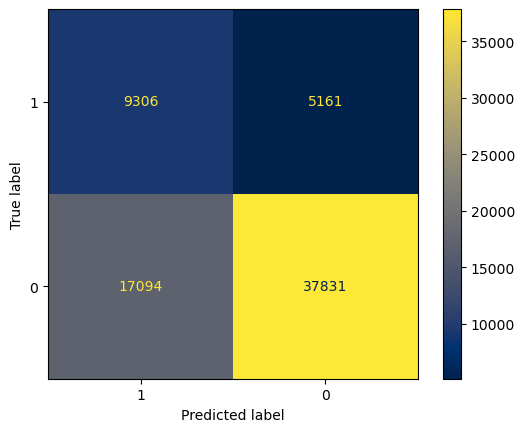

In [31]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=0)
xgb_clf.fit(X_train_rus, y_train_rus)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost Classifier'
model_eval(clf, y_test, y_pred,x)

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     54925
           1       0.35      0.62      0.44     14467

    accuracy                           0.68     69392
   macro avg       0.61      0.66      0.61     69392
weighted avg       0.76      0.68      0.70     69392

ROC_AUC_Score: 0.6562
F1 Score: 0.4447
Accurary Score: 0.6762
Precision Score: 0.3461
Recall Score: 0.6219


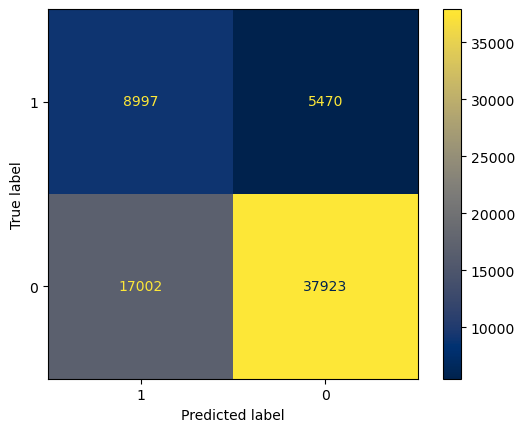

In [32]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
lr=lr.fit(X_train_rus, y_train_rus)
y_pred = lr.predict(X_test)
clf = 'Logistic Regression'
model_eval(clf, y_test, y_pred,x)

Support Vector Machines
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     54925
           1       0.34      0.61      0.44     14467

    accuracy                           0.67     69392
   macro avg       0.61      0.65      0.60     69392
weighted avg       0.76      0.67      0.70     69392

ROC_AUC_Score: 0.6514
F1 Score: 0.4394
Accurary Score: 0.6740
Precision Score: 0.3424
Recall Score: 0.6128


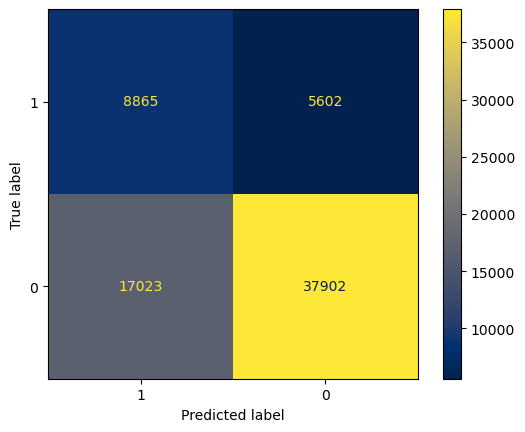

In [33]:
svm =LinearSVC()
svm=svm.fit(X_train_rus, y_train_rus)
y_pred = svm.predict(X_test)
clf = 'Support Vector Machines'
model_eval(clf, y_test, y_pred,x)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.70      0.80     54925
           1       0.40      0.77      0.53     14467

    accuracy                           0.71     69392
   macro avg       0.66      0.73      0.66     69392
weighted avg       0.81      0.71      0.74     69392

ROC_AUC_Score: 0.7338
F1 Score: 0.5284
Accurary Score: 0.7148
Precision Score: 0.4032
Recall Score: 0.7663


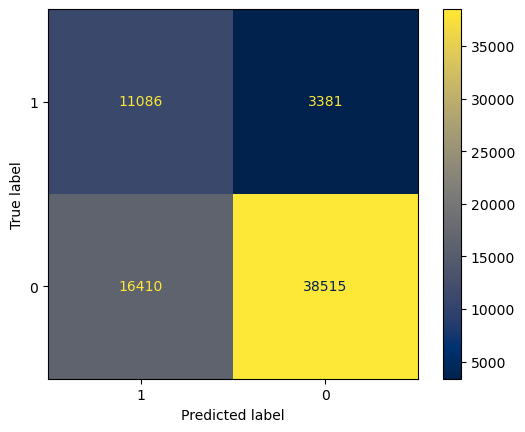

In [34]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train_rus, y_train_rus)
y_pred = dt.predict(X_test)
clf = 'Decision Tree Classifier'
model_eval(clf, y_test, y_pred,x)

AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.87      0.68      0.77     54925
           1       0.34      0.63      0.44     14467

    accuracy                           0.67     69392
   macro avg       0.61      0.66      0.61     69392
weighted avg       0.76      0.67      0.70     69392

ROC_AUC_Score: 0.6560
F1 Score: 0.4441
Accurary Score: 0.6718
Precision Score: 0.3433
Recall Score: 0.6288


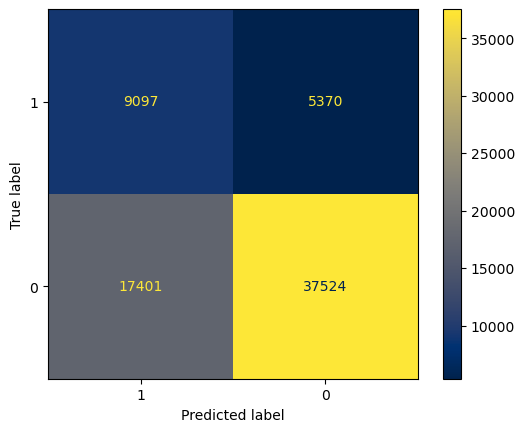

In [35]:
ada=AdaBoostClassifier()
ada=ada.fit(X_train_rus, y_train_rus)
y_pred = ada.predict(X_test)
clf = 'AdaBoost Classifier'
model_eval(clf, y_test, y_pred,x)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     54925
           1       0.49      0.83      0.61     14467

    accuracy                           0.78     69392
   macro avg       0.72      0.80      0.73     69392
weighted avg       0.85      0.78      0.80     69392

ROC_AUC_Score: 0.7998
F1 Score: 0.6149
Accurary Score: 0.7840
Precision Score: 0.4893
Recall Score: 0.8271


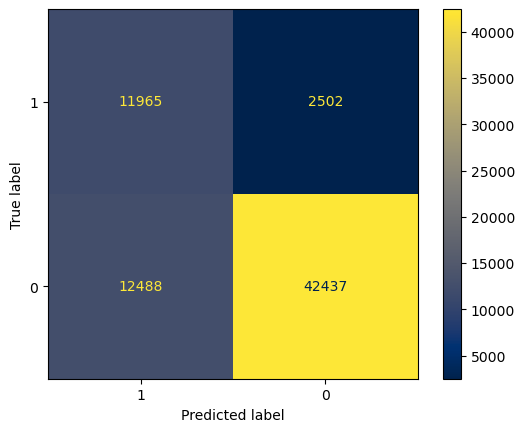

In [36]:
rfw=RandomForestClassifier()
rfw=rfw.fit(X_train_rus, y_train_rus)
y_pred = rfw.predict(X_test)
clf = 'Random Forest Classifier'
model_eval(clf, y_test, y_pred,x)

# Result

In [46]:
dicts = {'#':l,'Name':clf_name,'Accurary Score':acc,'ROC_AUC_Score':roc_auc,
         'F1 Score':f1,'Precision Score':pre, 'Recall Score':rec}
result = pd.DataFrame(dicts)
result.iloc[12:]

,#,Name,Accurary Score,ROC_AUC_Score,F1 Score,Precision Score,Recall Score
12,Under Sampler,XGBoost Classifier,0.679286,0.666016,0.455429,0.352500,0.643257
13,Under Sampler,Logistic Regression,0.676159,0.656174,0.444670,0.346052,0.621898
14,Under Sampler,Support Vector Machines,0.673954,0.651421,0.439351,0.342437,0.612774
15,Under Sampler,Decision Tree Classifier,0.714794,0.733762,0.528370,0.403186,0.766296
16,Under Sampler,AdaBoost Classifier,0.671850,0.655998,0.444135,0.343309,0.628810
17,Under Sampler,Random Forest Classifier,0.783981,0.799845,0.614851,0.489306,0.827055
